# Model Architecture

In [0]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *

def LINKNET(input_size=(256, 256, 1)):
    descr=8
    inputs = Input(input_size)
    conv1 = Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(int(1024/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(int(1024/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    #add classifier output
    #output1 = keras.layers.Conv2D(int(1024/descr),3)(drop5)
    #output1 = keras.layers.MaxPool2D(pool_size=(2, 2))(output1)
    #output1 = keras.layers.Dense(1)(output1)


    up6 = Conv2D(int(512/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = add([drop4,up6])
    conv6 = Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(int(256/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = add([conv3,up7])
    conv7 = Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(int(128/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = add([conv2,up8])
    conv8 = Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(int(64/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = add([conv1,up9])
    conv9 = Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = Conv2D(1, 1, padding = 'same',activation = 'sigmoid')(conv9)

    #model = keras.models.Model(inputs = inputs, outputs = [conv10,output1])
    model = Model(inputs = inputs, outputs = conv10)

    model.summary()

    return model

Using TensorFlow backend.


# Metric

he Metric IoU (Intersection over Unit / Jaccard-Coefficient) was used to measure the quality of the model. The closer the Jaccard coefficient is to 1, the greater the similarity of the quantities. The minimum value of the Jaccard coefficient is 0.
Original papper https://arxiv.org/abs/1902.09630

![IoU](https://github.com/tobiassteidle/ML_IDCard_Segmentation/raw/master/assets/iou_formular1.png)


![alt text](https://github.com/tobiassteidle/ML_IDCard_Segmentation/raw/master/assets/iou.png)

In [0]:


import numpy as np
import tensorflow as tf
from keras import backend as K


def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)



Have a quick look at the resulting model architecture:






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 8)  0           conv

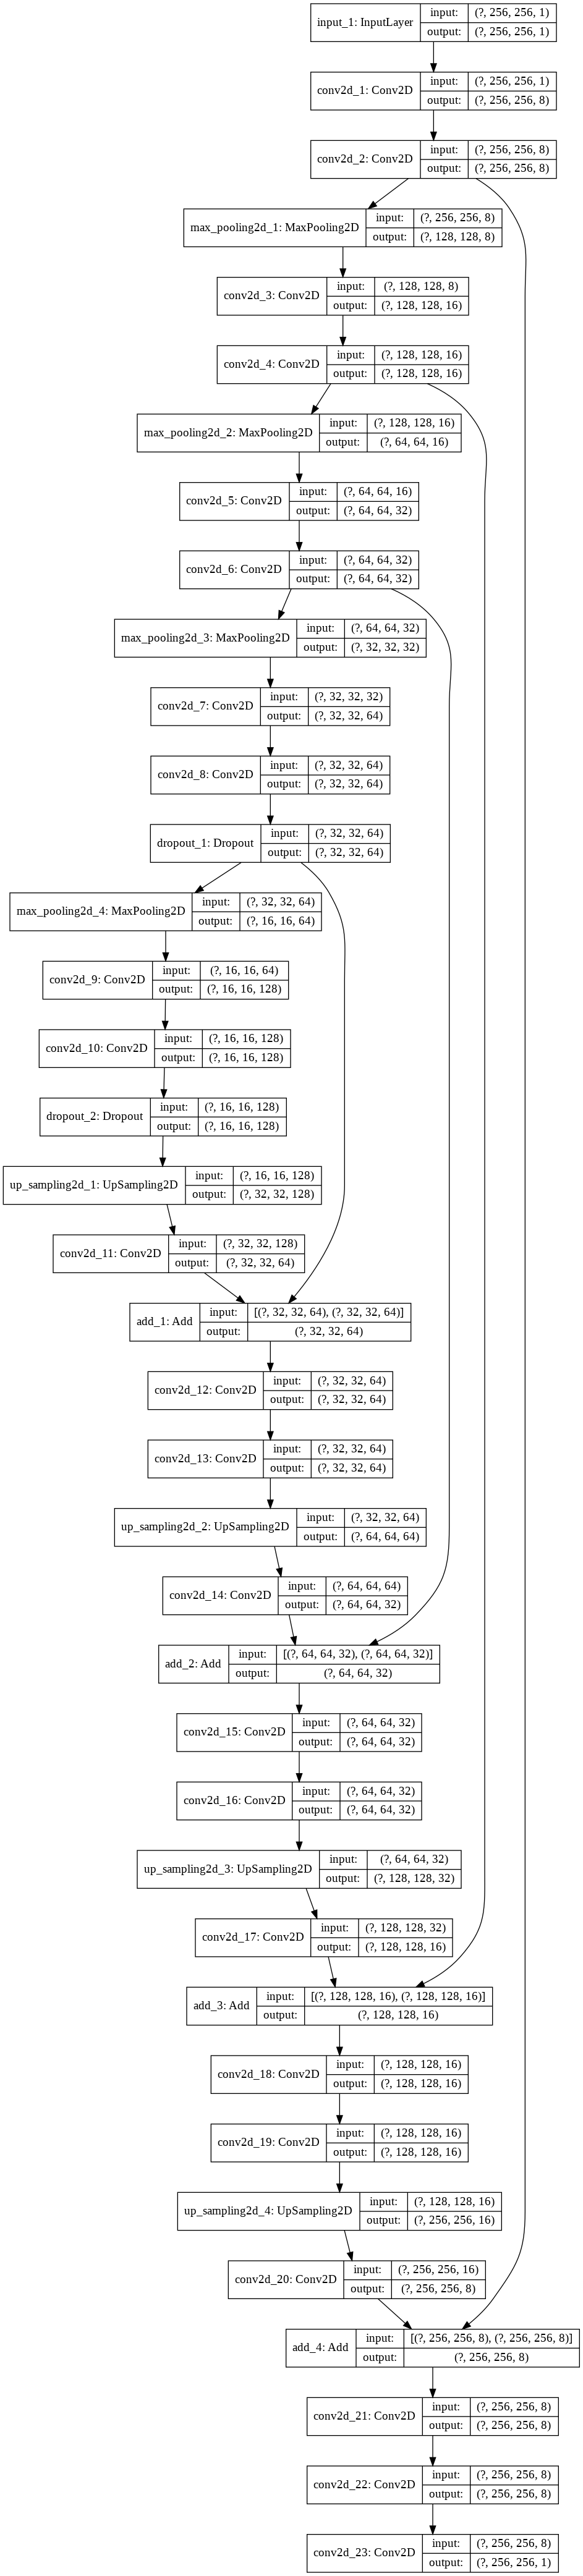

In [0]:
model = LINKNET(input_size=(256, 256, 1))
tf.keras.utils.plot_model(model, show_shapes=True)

# Download dataset

In [0]:
!gcloud init 

In [0]:
!gsutil cp -r  gs://yourbucketname/dataset.zip ./

In [0]:
!unzip -qq dataset.zip 

# Dataloaders

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import os
import random as rn

In [0]:
tf.__version__

'1.15.0'

In [0]:
NO_OF_TRAINING_IMAGES = len(os.listdir('/content/ML_IDCard_Segmentation/dataset/temp/docs_image/image'))
NO_OF_VAL_IMAGES = len(os.listdir('/content/ML_IDCard_Segmentation/dataset/temp/val_docs_image/val_image')) 

NO_OF_EPOCHS = 5
BATCH_SIZE = 8

IMAGE_SIZE = (256, 256)

SEED = 230
rn.seed(SEED)
np.random.seed(SEED)
tf.set_random_seed(SEED)
#tf.random.set_seed(SEED)

print(NO_OF_TRAINING_IMAGES)
print(NO_OF_VAL_IMAGES)

260
11


In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_image_generator = train_datagen.flow_from_directory('/content/ML_IDCard_Segmentation/dataset/temp/docs_image/',
                                                          target_size=IMAGE_SIZE,
                                                          class_mode=None,
                                                          batch_size=BATCH_SIZE,
                                                          color_mode='grayscale',
                                                          seed=SEED)

train_mask_generator = train_datagen.flow_from_directory('/content/ML_IDCard_Segmentation/dataset/temp/docs_image_mask/',
                                                          target_size=IMAGE_SIZE,
                                                          class_mode=None,
                                                          batch_size=BATCH_SIZE,
                                                          color_mode='grayscale',
                                                          seed=SEED)



train_generator = zip(train_image_generator, train_mask_generator)



Found 259 images belonging to 1 classes.
Found 259 images belonging to 1 classes.


In [0]:
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_image_generator = val_datagen.flow_from_directory('/content/ML_IDCard_Segmentation/dataset/temp/val_docs_image/',
                                                      target_size=IMAGE_SIZE,
                                                      class_mode=None,
                                                      batch_size=BATCH_SIZE,
                                                      color_mode='grayscale',
                                                      seed=SEED)

val_mask_generator = val_datagen.flow_from_directory('/content/ML_IDCard_Segmentation/dataset/temp/val_docs_image_mask',
                                                      target_size=IMAGE_SIZE,
                                                      class_mode=None,
                                                      batch_size=BATCH_SIZE,
                                                      color_mode='grayscale',
                                                      seed=SEED)

val_generator = zip(val_image_generator, val_mask_generator)

Found 11 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


#Train

In [0]:
import numpy as np
import tensorflow as tf
import time
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
from keras.optimizers import Adam

In [0]:
# build model
model = LINKNET(input_size=(256, 256, 1))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy', mean_iou])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 256, 256, 8)  80          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 256, 256, 8)  584         conv2d_70[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 128, 128, 8)  0           conv2d_71[0][0]                  
____________________________________________________________________________________________

In [0]:
# configure callbacks
checkpoint = ModelCheckpoint("model.h5", verbose=1, save_best_only=True, save_weights_only=False,
                              monitor='val_mean_iou', mode='max')
earlystopping = EarlyStopping(patience=10, verbose=1, monitor='val_mean_iou', mode='max')
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1, min_delta=0.000001,
                              monitor='val_mean_iou', mode='max')
tensorboard = TensorBoard(log_dir='./logs/' + time.strftime("%Y%m%d_%H%M%S"), histogram_freq=0,
                          write_graph=True, write_images=True)


In [0]:
# train model
model.fit_generator(train_generator, epochs=NO_OF_EPOCHS,
                    steps_per_epoch=(NO_OF_TRAINING_IMAGES // BATCH_SIZE),
                    validation_data=val_generator,
                    validation_steps=(NO_OF_VAL_IMAGES // BATCH_SIZE),
                    callbacks=[checkpoint, earlystopping, reduce_lr, tensorboard])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 8)  0           conv

'model.fit_generator(train_generator, epochs=NO_OF_EPOCHS,\n                    steps_per_epoch=(NO_OF_TRAINING_IMAGES // BATCH_SIZE),\n                    validation_data=val_generator,\n                    validation_steps=(NO_OF_VAL_IMAGES // BATCH_SIZE),\n                    callbacks=None)'

# Save Model

In [0]:
model.save('/content/some_linknet.h5')